Sentiment
positive    6268
negative    2428
neutral     1192
Name: count, dtype: int64
(9888, 14710) (9888,)
(7910, 14710) (7910,)
(1978, 14710) (1978,)
              precision    recall  f1-score   support

    negative       0.93      0.48      0.63       490
     neutral       0.00      0.00      0.00       234
    positive       0.72      1.00      0.84      1254

    accuracy                           0.75      1978
   macro avg       0.55      0.49      0.49      1978
weighted avg       0.69      0.75      0.69      1978

Predicted_Sentiment
positive    8434
negative    1454
Name: count, dtype: int64


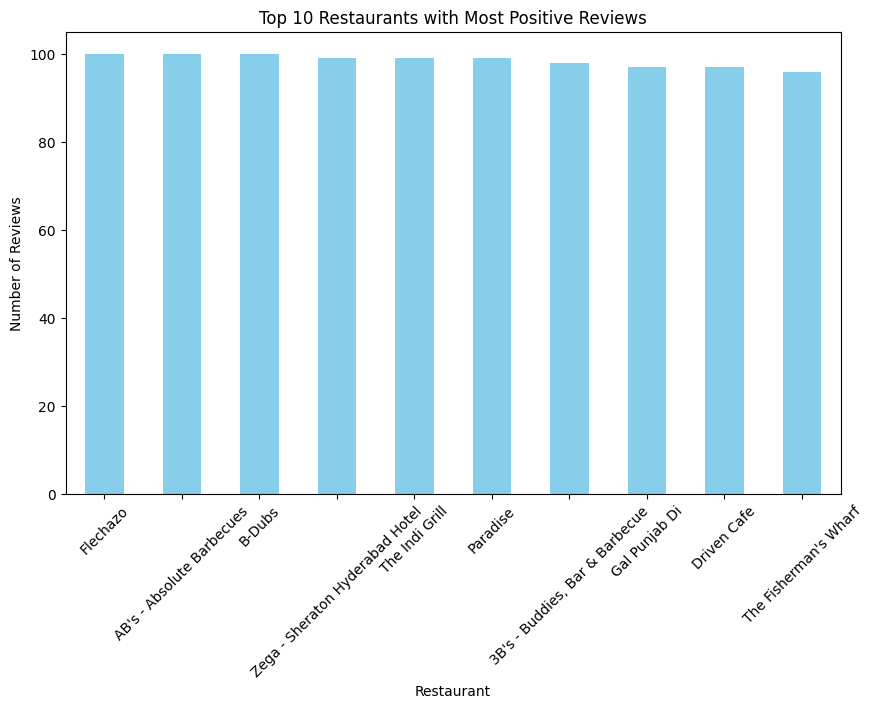

No data available for neutral sentiment


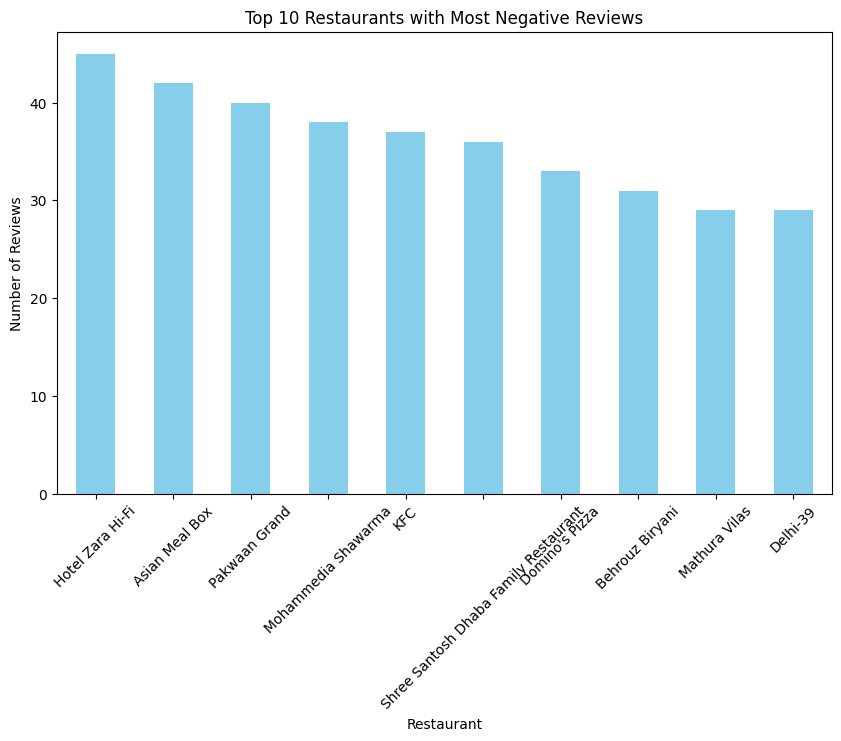

In [12]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Restaurant Scrapped Clean.csv')

# Mostrar las primeras filas del dataset
#print(df.head())

# Verificar que no hay valores nulos en las columnas importantes
#print(df.isnull().sum())

# Convertir la columna 'Rating' a enteros
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Eliminar filas con valores nulos en 'Rating' o 'Review'
df = df.dropna(subset=['Rating', 'Review'])

# Definir el sentimiento basado en el rating
def classify_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    elif rating <= 2:
        return 'negative'
    else:
        return 'unknown'

# Aplicar la función de clasificación de sentimiento
df['Sentiment'] = df['Rating'].apply(classify_sentiment)

# Filtrar los registros que tienen un sentimiento 'unknown' debido a ratings inválidos
df = df[df['Sentiment'] != 'unknown']

# Verificar el equilibrio de clases
print(df['Sentiment'].value_counts())

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Preprocesamiento del texto
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Review'])
y = df['Sentiment']

# Verificar que no tenemos un conjunto vacío
print(X.shape, y.shape)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar los tamaños después de la división
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Entrenamiento del modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# Agregar predicciones al dataframe original
df['Predicted_Sentiment'] = model.predict(tfidf.transform(df['Review']))

# Verificar que las predicciones se realizaron correctamente
print(df['Predicted_Sentiment'].value_counts())

def plot_reviews(df, sentiment):
    sentiment_df = df[df['Predicted_Sentiment'] == sentiment]
    if not sentiment_df.empty:
        top_restaurants = sentiment_df['Restaurant'].value_counts().head(10)
        
        plt.figure(figsize=(10, 6))
        top_restaurants.plot(kind='bar', color='skyblue')
        plt.title(f'Top 10 Restaurants with Most {sentiment.capitalize()} Reviews')
        plt.xlabel('Restaurant')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No data available for {sentiment} sentiment")

# Generar gráficos para cada tipo de sentimiento
plot_reviews(df, 'positive')
plot_reviews(df, 'neutral')
plot_reviews(df, 'negative')


Reporte de clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.78      0.78       490
     neutral       0.30      0.60      0.40       234
    positive       0.94      0.76      0.84      1254

    accuracy                           0.75      1978
   macro avg       0.67      0.71      0.67      1978
weighted avg       0.83      0.75      0.77      1978

Distribución de predicciones:
Predicted_Sentiment
positive    5336
negative    2404
neutral     2148
Name: count, dtype: int64


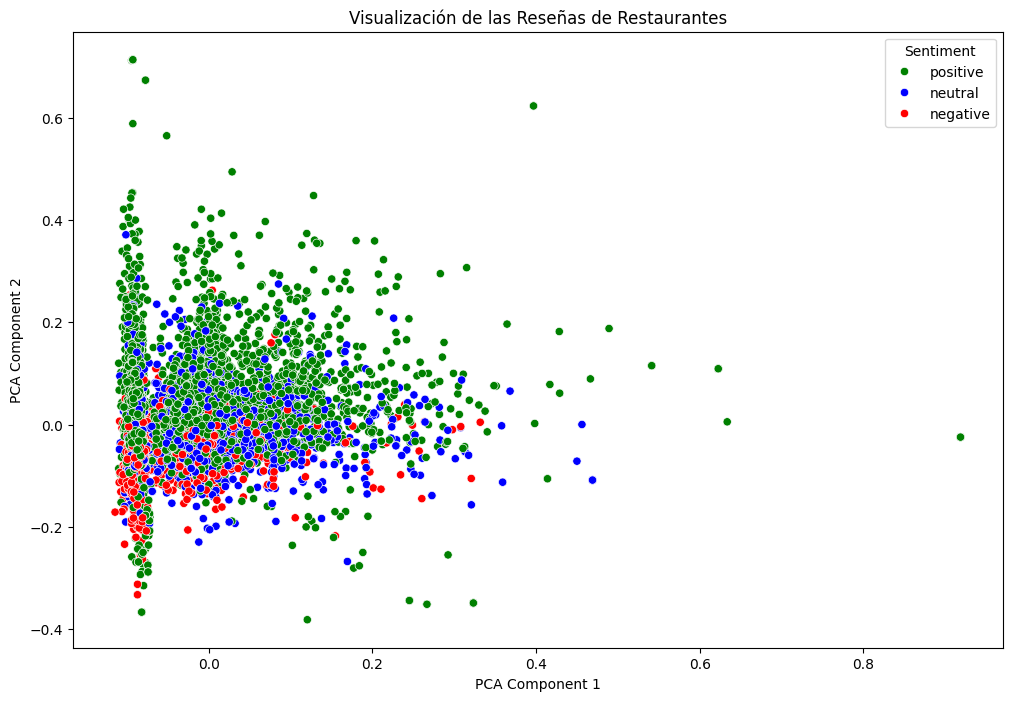

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# Cargar el dataset
df = pd.read_csv('Restaurant Scrapped Clean.csv')

# Convertir la columna 'Rating' a enteros
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Eliminar filas con valores nulos en 'Rating' o 'Review'
df = df.dropna(subset=['Rating', 'Review'])

# Definir el sentimiento basado en el rating
def classify_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    elif rating <= 2:
        return 'negative'
    else:
        return 'unknown'

# Aplicar la función de clasificación de sentimiento
df['Sentiment'] = df['Rating'].apply(classify_sentiment)

# Filtrar los registros que tienen un sentimiento 'unknown' debido a ratings inválidos
df = df[df['Sentiment'] != 'unknown']

# Preprocesamiento del texto
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Review'])
y = df['Sentiment']

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear las clases en el conjunto de entrenamiento
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Entrenar el modelo con las clases balanceadas
model = MultinomialNB()
model.fit(X_resampled, y_resampled)

# Evaluación del modelo
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

# Actualizar las predicciones en el dataframe original
df['Predicted_Sentiment'] = model.predict(tfidf.transform(df['Review']))
print("Distribución de predicciones:")
print(df['Predicted_Sentiment'].value_counts())

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Alternativamente, usar t-SNE para una mejor separación visual (más lento)
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X.toarray())

# Agregar las componentes PCA al dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Función para graficar los puntos con etiquetas
def plot_scatter(df):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Predicted_Sentiment', data=df, palette={'positive': 'green', 'neutral': 'blue', 'negative': 'red'})
    plt.title('Visualización de las Reseñas de Restaurantes')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Sentiment')
    plt.show()

# Generar el scatter plot
plot_scatter(df)





In [19]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Restaurant Scrapped Clean.csv')

# Listar los restaurantes únicos
unique_restaurants = df['Restaurant'].unique()
print("Lista de restaurantes:")
for restaurant in unique_restaurants:
    print(restaurant)


Lista de restaurantes:
Beyond Flavours
Paradise
Flechazo
Shah Ghouse Hotel & Restaurant
Over The Moon Brew Company
The Fisherman's Wharf
eat.fit
Shah Ghouse Spl Shawarma
Hyper Local
Cream Stone
Sardarji's Chaats & More
Barbeque Nation
Absolute Sizzlers
The Lal Street - Bar Exchange
AB's - Absolute Barbecues
KFC
NorFest - The Dhaba
Hotel Zara Hi-Fi
10 Downing Street
Pakwaan Grand
13 Dhaba
Jonathan's Kitchen - Holiday Inn Express & Suites
B-Dubs
Amul
SKYHY
Tiki Shack
Mustang Terrace Lounge
3B's - Buddies, Bar & Barbecue
Behrouz Biryani
Hunger Maggi Point
Pot Pourri
Pista House
Marsala Food Company
Club Rogue
Mazzo - Marriott Executive Apartments
Green Bawarchi Restaurant
Banana Leaf Multicuisine Restaurant
Kritunga Restaurant
The Glass Onion
Deli 9 Bistro
Frio Bistro
Karachi Bakery
Karachi Cafe
The Foodie Monster Kitchen
La La Land - Bar & Kitchen
Owm Nom Nom
Ulavacharu
Shanghai Chef 2
Udipi's Upahar
Mathura Vilas
Gal Punjab Di
Hitech Bawarchi Food Zone
Biryanis And More
Diners Pavilion


C:\Users\Darkm\AppData\Local\Temp\ipykernel_1796\3146587689.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Rating'] = pd.to_numeric(df_selected['Rating'], errors='coerce')


Reporte de clasificación:
              precision    recall  f1-score   support

    negative       0.81      0.85      0.83        20
     neutral       0.25      0.50      0.33         2
    positive       0.93      0.78      0.85        18

    accuracy                           0.80        40
   macro avg       0.66      0.71      0.67        40
weighted avg       0.84      0.80      0.81        40

Distribución de predicciones:
Predicted_Sentiment
negative    90
positive    82
neutral     27
Name: count, dtype: int64


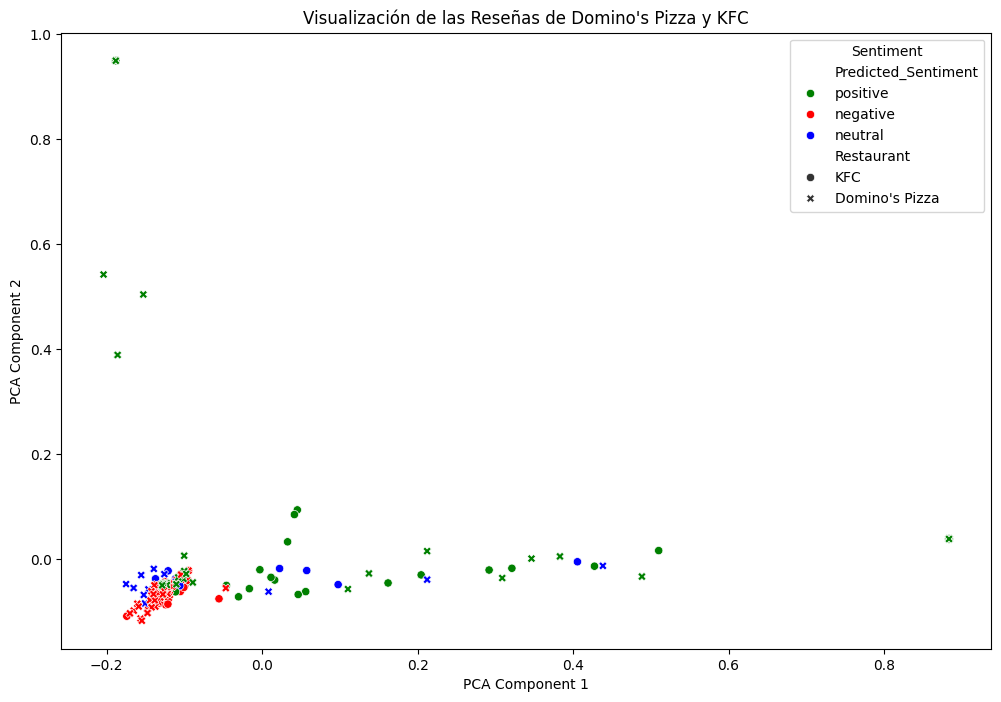

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# Cargar el dataset
df = pd.read_csv('Restaurant Scrapped Clean.csv')

# Filtrar el dataframe para incluir solo las reseñas de los dos restaurantes seleccionados
selected_restaurants = ["Domino's Pizza", 'KFC']
df_selected = df[df['Restaurant'].isin(selected_restaurants)]

# Convertir la columna 'Rating' a enteros
df_selected['Rating'] = pd.to_numeric(df_selected['Rating'], errors='coerce')

# Eliminar filas con valores nulos en 'Rating' o 'Review'
df_selected = df_selected.dropna(subset=['Rating', 'Review'])

# Definir el sentimiento basado en el rating
def classify_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    elif rating <= 2:
        return 'negative'
    else:
        return 'unknown'

# Aplicar la función de clasificación de sentimiento
df_selected['Sentiment'] = df_selected['Rating'].apply(classify_sentiment)

# Filtrar los registros que tienen un sentimiento 'unknown' debido a ratings inválidos
df_selected = df_selected[df_selected['Sentiment'] != 'unknown']

# Preprocesamiento del texto
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df_selected['Review'])
y = df_selected['Sentiment']

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear las clases en el conjunto de entrenamiento
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Entrenar el modelo con las clases balanceadas
model = MultinomialNB()
model.fit(X_resampled, y_resampled)

# Evaluación del modelo
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

# Actualizar las predicciones en el dataframe original
df_selected['Predicted_Sentiment'] = model.predict(tfidf.transform(df_selected['Review']))
print("Distribución de predicciones:")
print(df_selected['Predicted_Sentiment'].value_counts())

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Agregar las componentes PCA al dataframe
df_selected['PCA1'] = X_pca[:, 0]
df_selected['PCA2'] = X_pca[:, 1]

# Función para graficar los puntos con etiquetas
def plot_scatter(df):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Predicted_Sentiment', style='Restaurant', data=df, palette={'positive': 'green', 'neutral': 'blue', 'negative': 'red'})
    plt.title('Visualización de las Reseñas de Domino\'s Pizza y KFC')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Sentiment')
    plt.show()

# Generar el scatter plot
plot_scatter(df_selected)
